In [335]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore") 

## 1. Pemahaman Data

In [336]:
#membaca data
data=pd.read_csv('C:\IDX partners\datacredit.csv')
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
#mengidentifikasi missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## 2. Menentukan Target

In [339]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

#### Angka 1 berarti kemungkinan besar tidak bisa membayar atau akan merugikan, dan angka 0 berarti kemungkinan bisa membayar

In [340]:
data['good_bad']= np.where(data.loc[:, 'loan_status'].isin (['Charged Off','Default','Late (31-120 days)', 
                                                         'In Grace Period', 'Late (16-30 days)','Does not meet the credit policy. Status:Charged Off'])
                            , 1 , 0)


In [341]:
data.good_bad.value_counts()

good_bad
0    410953
1     55332
Name: count, dtype: int64

In [342]:
data[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0
...,...,...
466280,Current,0
466281,Charged Off,1
466282,Current,0
466283,Fully Paid,0


In [343]:
# Cetak nama-nama kolom dalam DataFrame
print(data.columns)

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

## 3. Data Cleaning (Missing Values)

In [344]:
#mengeksekusi missing values
missing_values = pd.DataFrame(data.isnull().sum()/data.shape[0])

In [345]:
missing_values = missing_values [missing_values.iloc[:, 0]>0.50]

In [346]:
missing_values.sort_values([0], ascending=False)

,0
open_il_24m,1.000000
mths_since_rcnt_il,1.000000
total_cu_tl,1.000000
inq_fi,1.000000
all_util,1.000000
max_bal_bc,1.000000
open_rv_24m,1.000000
open_rv_12m,1.000000
il_util,1.000000
total_bal_il,1.000000


In [347]:
# Menghapus kolom dengan lebih dari 50% nilai null
data.dropna(thresh=data.shape[0]*0.5, axis=1, inplace=True)

In [348]:
missing_values = pd.DataFrame(data.isnull().sum()/data.shape[0])
missing_values = missing_values [missing_values.iloc[:, 0]>0.50]
missing_values.sort_values([0], ascending=False)

,0


## 4. Data Splitting

In [350]:
from sklearn.model_selection import train_test_split

In [351]:
#membagi dataset menjadi 80% train dan 20% untuk test
X = data.drop('good_bad', axis=1)
y = data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

In [352]:
X_train.shape, X_test.shape

((373028, 54), (93257, 54))

In [353]:
y_train.value_counts(normalize=True)

good_bad
0    0.881333
1    0.118667
Name: proportion, dtype: float64

In [354]:
y_test.value_counts(normalize=True)

good_bad
0    0.881339
1    0.118661
Name: proportion, dtype: float64

## 5. Data Prepocessing

In [356]:
print(X_train)

        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
40390        40390    527379     682171       7200         7200   
24349        24349    600784     771034      12000        12000   
420905      420905  13146556   15168744      16000        16000   
30522        30522    508280     655753       7000         7000   
285358      285358  30185588   32728785       7200         7200   
...            ...       ...        ...        ...          ...   
339806      339806  12978874   15011046      10725        10725   
234203      234203  37237456   40010203       6000         6000   
391290      391290  16251496   18354028      22500        22500   
282147      282147  29003998   31527200       3000         3000   
234394      234394  37287460   40060211      18000        18000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
40390       7195.872999   60 months     16.82       178.25     E  ...   
24349      12000.000000   36 months     10.36    

In [357]:
for col in X_train.select_dtypes(include=['object', 'bool']).columns:
    print(col)
    print(X_train[col].unique())
    print()


term
[' 60 months' ' 36 months']

grade
['E' 'B' 'A' 'C' 'D' 'F' 'G']

sub_grade
['E2' 'B5' 'A4' 'C5' 'A2' 'B3' 'C4' 'D4' 'A5' 'C2' 'D1' 'E4' 'D5' 'D2'
 'A1' 'B4' 'B1' 'A3' 'B2' 'D3' 'C3' 'E3' 'F1' 'E1' 'E5' 'C1' 'F4' 'G1'
 'F5' 'G3' 'F2' 'G2' 'F3' 'G5' 'G4']

emp_title


['IBM' 'Mars Chocolate na' 'Strategic Account Manager' ...
 'all for you photography' 'Amazon Fulfillment - RIC2 Stower'
 'engineering assitant']

emp_length
['4 years' '10+ years' '3 years' '2 years' '< 1 year' '7 years' '6 years'
 '1 year' '8 years' '9 years' '5 years' nan]

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Not Verified' 'Source Verified']

issue_d
['Jun-10' 'Oct-10' 'Mar-14' 'May-10' 'Oct-14' 'Feb-14' 'Nov-14' 'Oct-13'
 'Jan-14' 'Nov-13' 'Jun-14' 'Apr-14' 'Nov-12' 'Aug-14' 'May-14' 'Oct-09'
 'Feb-13' 'Oct-12' 'Apr-11' 'Sep-13' 'Mar-10' 'Jul-14' 'Sep-14' 'Mar-13'
 'Feb-12' 'May-13' 'Aug-13' 'Apr-13' 'Jul-12' 'Jan-13' 'Dec-07' 'Dec-11'
 'Nov-10' 'Jun-09' 'Dec-12' 'Jun-13' 'Aug-11' 'Nov-09' 'Jun-12' 'Jan-11'
 'Feb-11' 'Dec-13' 'Sep-11' 'Sep-09' 'Sep-10' 'May-09' 'Apr-12' 'Sep-08'
 'May-11' 'Dec-14' 'Aug-09' 'Jul-13' 'Aug-12' 'Mar-11' 'Jan-09' 'Jan-10'
 'Feb-09' 'Nov-11' 'Dec-10' 'Dec-09' 'May-12' 'Mar-12' 'Feb-08' 'Apr-10'


In [358]:
# Kolom/feature yang harus di cleaning
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 
                    'next_pymnt_d', 'last_credit_pull_d']

In [359]:
X_train['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [360]:
X_train['term'] = X_train['term'].astype(str)

# Gunakan metode .str.replace()
X_train['term'] = pd.to_numeric(X_train['term'].str.replace('months', ''))

In [361]:
X_train['term']

40390     60
24349     36
420905    36
30522     36
285358    36
          ..
339806    60
234203    36
391290    36
282147    36
234394    36
Name: term, Length: 373028, dtype: int64

In [362]:
X_train['emp_length'].unique

<bound method Series.unique of 40390       4 years
24349     10+ years
420905    10+ years
30522       3 years
285358      2 years
            ...    
339806          NaN
234203     < 1 year
391290      4 years
282147    10+ years
234394    10+ years
Name: emp_length, Length: 373028, dtype: object>

In [363]:
# Convert the column to string type
X_train['emp_length'] = X_train['emp_length'].astype(str)

# Replace "10+ years" with "10"
X_train['emp_length'] = X_train['emp_length'].replace('10+ years', str(10))
# Remove " years"
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
# Replace "< 1 year" with "0"
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
# Replace " year" with empty string
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

# Mengganti string kosong dengan "0"
X_train['emp_length'].replace('', '0', inplace=True)
# Mengonversi kolom 'emp_length' menjadi numerik
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'], errors='coerce')
# Menangani nilai NaN setelah konversi
X_train['emp_length'].fillna(value=0, inplace=True)
# Mengonversi kolom 'emp_length' menjadi tipe data integer
X_train['emp_length'] = X_train['emp_length'].astype(int)

In [364]:
print(X_train['emp_length'].unique())
print("Jumlah nilai NaN:", X_train['emp_length'].isna().sum())


[ 4 10  3  2  0  7  6  1  8  9  5]
Jumlah nilai NaN: 0


In [365]:
X_train['emp_length']

40390      4
24349     10
420905    10
30522      3
285358     2
          ..
339806     0
234203     0
391290     4
282147    10
234394    10
Name: emp_length, Length: 373028, dtype: int32

In [366]:
## Cek feature date
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [367]:
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
40390,Jun-10,Jan-89,Jan-15,Feb-15,Jan-16
24349,Oct-10,Aug-90,Nov-13,NaN,Nov-13
420905,Mar-14,Feb-01,Jan-16,Feb-16,Jan-16
30522,May-10,Aug-98,May-13,NaN,May-13
285358,Oct-14,Sep-91,Jan-16,Feb-16,Jan-16
...,...,...,...,...,...
339806,Jul-14,Feb-05,Dec-15,Feb-16,Jan-16
234203,Dec-14,Jun-01,Jul-15,NaN,Jan-16
391290,May-14,Jun-97,Dec-15,Feb-16,Jan-16
282147,Oct-14,Aug-00,Apr-15,NaN,Jan-16


In [368]:
X_train['issue_d'].unique()

array(['Jun-10', 'Oct-10', 'Mar-14', 'May-10', 'Oct-14', 'Feb-14',
       'Nov-14', 'Oct-13', 'Jan-14', 'Nov-13', 'Jun-14', 'Apr-14',
       'Nov-12', 'Aug-14', 'May-14', 'Oct-09', 'Feb-13', 'Oct-12',
       'Apr-11', 'Sep-13', 'Mar-10', 'Jul-14', 'Sep-14', 'Mar-13',
       'Feb-12', 'May-13', 'Aug-13', 'Apr-13', 'Jul-12', 'Jan-13',
       'Dec-07', 'Dec-11', 'Nov-10', 'Jun-09', 'Dec-12', 'Jun-13',
       'Aug-11', 'Nov-09', 'Jun-12', 'Jan-11', 'Feb-11', 'Dec-13',
       'Sep-11', 'Sep-09', 'Sep-10', 'May-09', 'Apr-12', 'Sep-08',
       'May-11', 'Dec-14', 'Aug-09', 'Jul-13', 'Aug-12', 'Mar-11',
       'Jan-09', 'Jan-10', 'Feb-09', 'Nov-11', 'Dec-10', 'Dec-09',
       'May-12', 'Mar-12', 'Feb-08', 'Apr-10', 'Apr-09', 'Jun-11',
       'Jul-10', 'Aug-10', 'Sep-12', 'Feb-10', 'Jun-08', 'Jul-11',
       'Oct-11', 'Jan-08', 'Apr-08', 'Jan-12', 'Mar-09', 'Oct-08',
       'May-08', 'Jul-08', 'Jul-09', 'Oct-07', 'Dec-08', 'Aug-07',
       'Mar-08', 'Nov-07', 'Nov-08', 'Jul-07', 'Sep-07', 'Jun-

In [369]:
X_train['issue_d'] = pd.to_datetime(X_train['issue_d'], format='%b-%y', errors='coerce')


In [370]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col], errors='coerce', format='%b-%y')


In [371]:
X_train['issue_d']

40390    2010-06-01
24349    2010-10-01
420905   2014-03-01
30522    2010-05-01
285358   2014-10-01
            ...    
339806   2014-07-01
234203   2014-12-01
391290   2014-05-01
282147   2014-10-01
234394   2014-12-01
Name: issue_d, Length: 373028, dtype: datetime64[ns]

In [372]:
#melakukan yang sama untuk X_test
X_test['term'] = X_test['term'].astype(str)

# Gunakan metode .str.replace()
X_test['term'] = pd.to_numeric(X_test['term'].str.replace('months', ''))

In [373]:

# Convert the column to string type
X_test['emp_length'] = X_test['emp_length'].astype(str)

# Replace "10+ years" with "10"
X_test['emp_length'] = X_test['emp_length'].replace('10+ years', str(10))
# Remove " years"
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
# Replace "< 1 year" with "0"
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
# Replace " year" with empty string
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

# Mengganti string kosong dengan "0"
X_test['emp_length'].replace('', '0', inplace=True)
# Mengonversi kolom 'emp_length' menjadi numerik
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'], errors='coerce')
# Menangani nilai NaN setelah konversi
X_test['emp_length'].fillna(value=0, inplace=True)
# Mengonversi kolom 'emp_length' menjadi tipe data integer
X_test['emp_length'] = X_test['emp_length'].astype(int)

In [374]:
X_test['issue_d'] = pd.to_datetime(X_test['issue_d'], format='%b-%y', errors='coerce')
for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col], errors='coerce', format='%b-%y')


In [375]:
X_test['issue_d']

45967    2013-12-01
85036    2013-10-01
96879    2013-09-01
297850   2014-10-01
66790    2013-11-01
            ...    
1868     2011-11-01
438110   2014-02-01
66400    2013-11-01
167062   2013-02-01
445166   2014-02-01
Name: issue_d, Length: 93257, dtype: datetime64[ns]

In [376]:
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
40390,2010-06-01,1989-01-01,2015-01-01,2015-02-01,2016-01-01
24349,2010-10-01,1990-08-01,2013-11-01,NaT,2013-11-01
420905,2014-03-01,2001-02-01,2016-01-01,2016-02-01,2016-01-01
30522,2010-05-01,1998-08-01,2013-05-01,NaT,2013-05-01
285358,2014-10-01,1991-09-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...
339806,2014-07-01,2005-02-01,2015-12-01,2016-02-01,2016-01-01
234203,2014-12-01,2001-06-01,2015-07-01,NaT,2016-01-01
391290,2014-05-01,1997-06-01,2015-12-01,2016-02-01,2016-01-01
282147,2014-10-01,2000-08-01,2015-04-01,NaT,2016-01-01


In [377]:
X_test[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
45967,2013-12-01,1999-10-01,2016-01-01,NaT,2016-01-01
85036,2013-10-01,2000-04-01,2015-06-01,NaT,2015-12-01
96879,2013-09-01,2002-07-01,2016-01-01,2016-02-01,2016-01-01
297850,2014-10-01,2000-05-01,2014-11-01,NaT,2014-10-01
66790,2013-11-01,1997-01-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...
1868,2011-11-01,1999-11-01,2014-06-01,NaT,2016-01-01
438110,2014-02-01,2003-03-01,2015-12-01,2016-01-01,2016-01-01
66400,2013-11-01,1992-03-01,2016-01-01,2016-02-01,2016-01-01
167062,2013-02-01,1985-04-01,2015-02-01,NaT,2016-01-01


In [378]:
# Check apakah berhasil di cleaning
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 93257 entries, 45967 to 445166
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   term                93257 non-null  int64         
 1   emp_length          93257 non-null  int32         
 2   issue_d             93257 non-null  datetime64[ns]
 3   earliest_cr_line    93252 non-null  datetime64[ns]
 4   last_pymnt_d        93180 non-null  datetime64[ns]
 5   next_pymnt_d        47713 non-null  datetime64[ns]
 6   last_credit_pull_d  93245 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int32(1), int64(1)
memory usage: 5.3 MB


## Feature Engineering

In [379]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373028, 54), (373028,), (93257, 54), (93257,))

In [380]:
# Kolom yang akan di feature engineering
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [381]:
X_train[col_need_to_clean]

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
40390,60,4,2010-06-01,1989-01-01,2015-01-01,2015-02-01,2016-01-01
24349,36,10,2010-10-01,1990-08-01,2013-11-01,NaT,2013-11-01
420905,36,10,2014-03-01,2001-02-01,2016-01-01,2016-02-01,2016-01-01
30522,36,3,2010-05-01,1998-08-01,2013-05-01,NaT,2013-05-01
285358,36,2,2014-10-01,1991-09-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...,...,...
339806,60,0,2014-07-01,2005-02-01,2015-12-01,2016-02-01,2016-01-01
234203,36,0,2014-12-01,2001-06-01,2015-07-01,NaT,2016-01-01
391290,36,4,2014-05-01,1997-06-01,2015-12-01,2016-02-01,2016-01-01
282147,36,10,2014-10-01,2000-08-01,2015-04-01,NaT,2016-01-01


In [382]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [383]:
print('next_pymnt_d' in X_train.columns)

True


In [384]:
print(X_test.columns)

Index(['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')


In [385]:
print(X_train.columns)

Index(['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')


In [386]:
X_train_selected = X_train[col_need_to_clean]

In [387]:
X_train[col_need_to_clean]


,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
40390,60,4,2010-06-01,1989-01-01,2015-01-01,2015-02-01,2016-01-01
24349,36,10,2010-10-01,1990-08-01,2013-11-01,NaT,2013-11-01
420905,36,10,2014-03-01,2001-02-01,2016-01-01,2016-02-01,2016-01-01
30522,36,3,2010-05-01,1998-08-01,2013-05-01,NaT,2013-05-01
285358,36,2,2014-10-01,1991-09-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...,...,...
339806,60,0,2014-07-01,2005-02-01,2015-12-01,2016-02-01,2016-01-01
234203,36,0,2014-12-01,2001-06-01,2015-07-01,NaT,2016-01-01
391290,36,4,2014-05-01,1997-06-01,2015-12-01,2016-02-01,2016-01-01
282147,36,10,2014-10-01,2000-08-01,2015-04-01,NaT,2016-01-01


In [388]:
# tidak dibutuhkan untuk feature engineering
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [389]:
X_train.shape, X_test.shape

((373028, 6), (93257, 6))

In [390]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373028, 6), (373028,), (93257, 6), (93257,))

In [391]:
from datetime import date

date.today().strftime('%Y-%m-%d')

'2024-01-01'

In [392]:
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd

def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format="%b-%y")
    
    # Calculate the number of months
    df['mths_since_' + column] = (today_date - df[column]).dt.days // 30
    
    # Drop the original date column
    df.drop(columns=[column], inplace=True)

# Example usage
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')


In [393]:
# apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [394]:
X_train

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
40390,60,4,426.0,165,109.0,97.0
24349,36,10,406.0,161,123.0,123.0
420905,36,10,278.0,119,97.0,97.0
30522,36,3,309.0,166,129.0,129.0
285358,36,2,393.0,112,97.0,97.0
...,...,...,...,...,...,...
339806,60,0,230.0,115,98.0,97.0
234203,36,0,274.0,110,103.0,97.0
391290,36,4,323.0,117,98.0,97.0
282147,36,10,285.0,112,106.0,97.0


In [395]:
X_test

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
45967,60,9,295.0,122,97.0,97.0
85036,36,10,289.0,124,104.0,98.0
96879,36,9,261.0,125,97.0,97.0
297850,36,10,288.0,112,111.0,112.0
66790,36,8,328.0,123,97.0,97.0
...,...,...,...,...,...,...
1868,36,10,294.0,148,116.0,97.0
438110,36,3,253.0,120,98.0,97.0
66400,60,10,387.0,123,97.0,97.0
167062,36,8,471.0,132,108.0,97.0


In [396]:
X_test.isnull().sum()

term                              0
emp_length                        0
mths_since_earliest_cr_line       5
mths_since_issue_d                0
mths_since_last_pymnt_d          77
mths_since_last_credit_pull_d    12
dtype: int64

In [397]:
X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line       24
mths_since_issue_d                 0
mths_since_last_pymnt_d          299
mths_since_last_credit_pull_d     30
dtype: int64

In [398]:
#dilakukan pengisian pada nilai yang masih kosong dengan median

for col in ['mths_since_issue_d', 'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d']:
    X_train.fillna(X_train.median(), inplace=True)
    X_test.fillna(X_test.median(), inplace=True)

In [400]:
print(X_train.isnull().sum())


term                             0
emp_length                       0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64


In [401]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373028, 6), (373028,), (93257, 6), (93257,))

## 6. (a) Modelling logistic regression

In [402]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [403]:
from sklearn.linear_model import LogisticRegression

In [404]:
model = LogisticRegression()

In [405]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [406]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [407]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8795050237515682

In [408]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

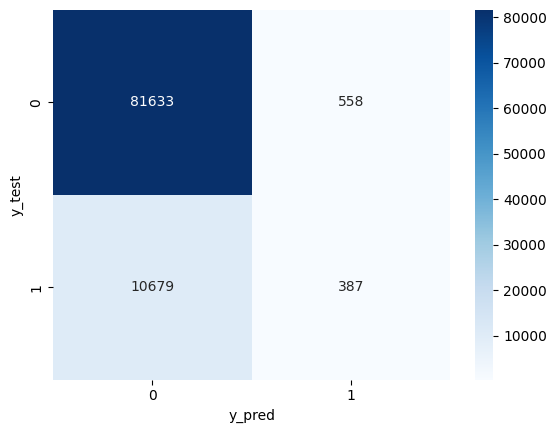

In [409]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [410]:
from sklearn.metrics import classification_report

# Evaluasi model pada data test
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.94     82191
           1       0.41      0.03      0.06     11066

    accuracy                           0.88     93257
   macro avg       0.65      0.51      0.50     93257
weighted avg       0.83      0.88      0.83     93257



Dikarenakan ini terlihat imbalance, maka akan dicoba model threshold

In [411]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

### kolom sebelah kiri untuk prediksi kelas 0 (berhasil bayar) kolom sebelah kanan untuk prediksi kelas 1 (gagal bayar)

In [412]:
model.predict_proba(X_test)

array([[0.91066429, 0.08933571],
       [0.91838223, 0.08161777],
       [0.9546118 , 0.0453882 ],
       ...,
       [0.92256523, 0.07743477],
       [0.93161729, 0.06838271],
       [0.94904775, 0.05095225]])

In [413]:
# memprediksi probability dan mengambil probability kelas positive
y_pred = model.predict_proba(X_test)[:, 1] 

In [414]:
y_pred

array([0.08933571, 0.08161777, 0.0453882 , ..., 0.07743477, 0.06838271,
       0.05095225])

In [415]:
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

(array([4.8183e+04, 3.0239e+04, 8.3940e+03, 3.5550e+03, 1.4720e+03,
        7.1700e+02, 3.7100e+02, 2.1400e+02, 9.2000e+01, 2.0000e+01]),
 array([0.00117776, 0.09074303, 0.18030831, 0.26987358, 0.35943885,
        0.44900412, 0.53856939, 0.62813466, 0.71769994, 0.80726521,
        0.89683048]),
 <BarContainer object of 10 artists>)

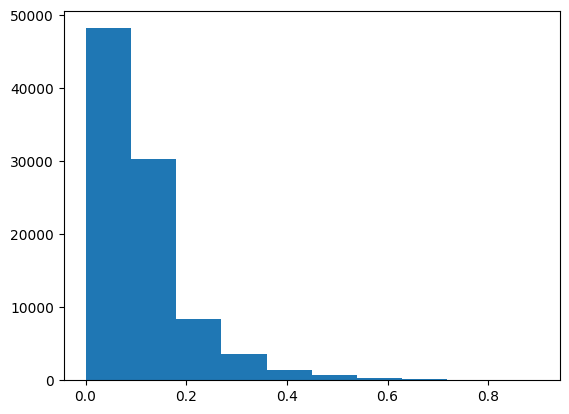

In [416]:
plt.hist(y_pred)

karena ini banyaknya di sekitaran 0.0 sampai 0.1 maka kita tidak bisa menetapkan thresholdnya 0.5, kita harus mencari terlebih dahulu best thresholdnya dengan true dan false positive rate

In [417]:
from sklearn. metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [418]:
# youden j-statistic
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.09789690529662526

## hipotesanya: jika hasil prediksi loan ada diatas 0.097 kemungkinan besar dia akan gagal bayar

In [419]:
y_pred = model.predict_proba(X_test)[:, 1]
(y_pred > 0.097).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [420]:
best_thresh = 0.097
y_pred_binary = (y_pred > best_thresh).astype(int)

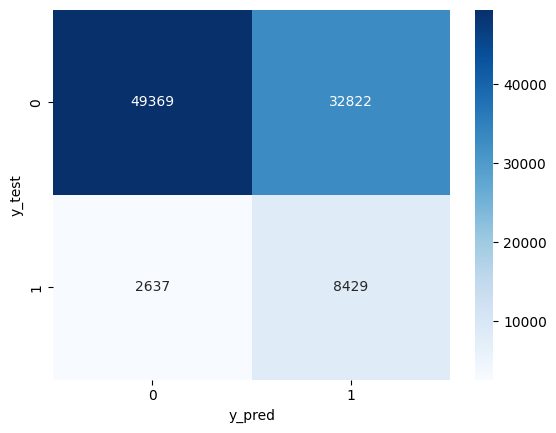

In [421]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Gambar heatmap confusion matrix
sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

## 6. (b) Evaluasi

In [422]:
from sklearn.metrics import classification_report

# Evaluasi model pada data test
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     82191
           1       0.41      0.03      0.06     11066

    accuracy                           0.88     93257
   macro avg       0.65      0.51      0.50     93257
weighted avg       0.83      0.88      0.83     93257



In [428]:
coefficients = model.coef_
model.coef_

array([[ 0.02548758, -0.01094866, -0.00104008, -0.04931341,  0.08971926,
        -0.01179156]])

In [425]:
model.intercept_

array([-4.98841785])

In [426]:
df_coeff = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coeff

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.025488,-0.010949,-0.00104,-0.049313,0.089719,-0.011792


In [427]:
X_train.head()

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
40390,60,4,426.0,165,109.0,97.0
24349,36,10,406.0,161,123.0,123.0
420905,36,10,278.0,119,97.0,97.0
30522,36,3,309.0,166,129.0,129.0
285358,36,2,393.0,112,97.0,97.0
